<a href="https://colab.research.google.com/github/K1ngBCP/DS_Machine-Learning/blob/main/_DS5D04_Bagas_Cahyo_Purnomo_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Disini saya mengimport library yang saya butuhkan yakni pandas, numpy, matpolib dan seaborn

In [ ]:
from google.colab import files
Data = files.upload()

Saving heart.csv to heart (5).csv


Disini Saya Mengimport datsetnyadan memasukkannya ke variabel data

In [ ]:
df = pd.read_csv("heart.csv")

Disini saya membacanya menggunakan bantuan pandas dan menamainya dengan df

In [ ]:
df.describe().round(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00
mean,54.43,0.70,0.94,131.61,246.00,0.15,0.53,149.11,0.34,1.07,1.39,0.75,2.32,0.51
std,9.07,0.46,1.03,17.52,51.59,0.36,0.53,23.01,0.47,1.18,0.62,1.03,0.62,0.50
min,29.00,0.00,0.00,94.00,126.00,0.00,0.00,71.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,48.00,0.00,0.00,120.00,211.00,0.00,0.00,132.00,0.00,0.00,1.00,0.00,2.00,0.00
50%,56.00,1.00,1.00,130.00,240.00,0.00,1.00,152.00,0.00,0.80,1.00,0.00,2.00,1.00
75%,61.00,1.00,2.00,140.00,275.00,0.00,1.00,166.00,1.00,1.80,2.00,1.00,3.00,1.00
max,77.00,1.00,3.00,200.00,564.00,1.00,2.00,202.00,1.00,6.20,2.00,4.00,3.00,1.00


Lalu disini saya menampikan statistiknya menggunakan describe() lalu saya bulatkan komanya menjadi2 angka dibelakang koma menggunakan round(2)

## Data Preparation

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


Kita dapatmengetahui data itu null atau tidak menggunakan .info()

In [ ]:
df.duplicated().sum()

723

Disini saya mencari data dupilat menggunakan .duplicated().sum() yang fungsinya menotal data yang ada duplikasi dalam dataset ini

In [ ]:
df.drop_duplicates(inplace=True)

Lalu disini saya menghandlenya sengan menggunakan drop_duplicates() agar data duplikasi tadi dihapus sehingga tidak menganggu proses selanjutnyadan juga menggunakan parameter inplace=True agar langsung mendrop duplicatesnya di dataset itu

<Axes: >

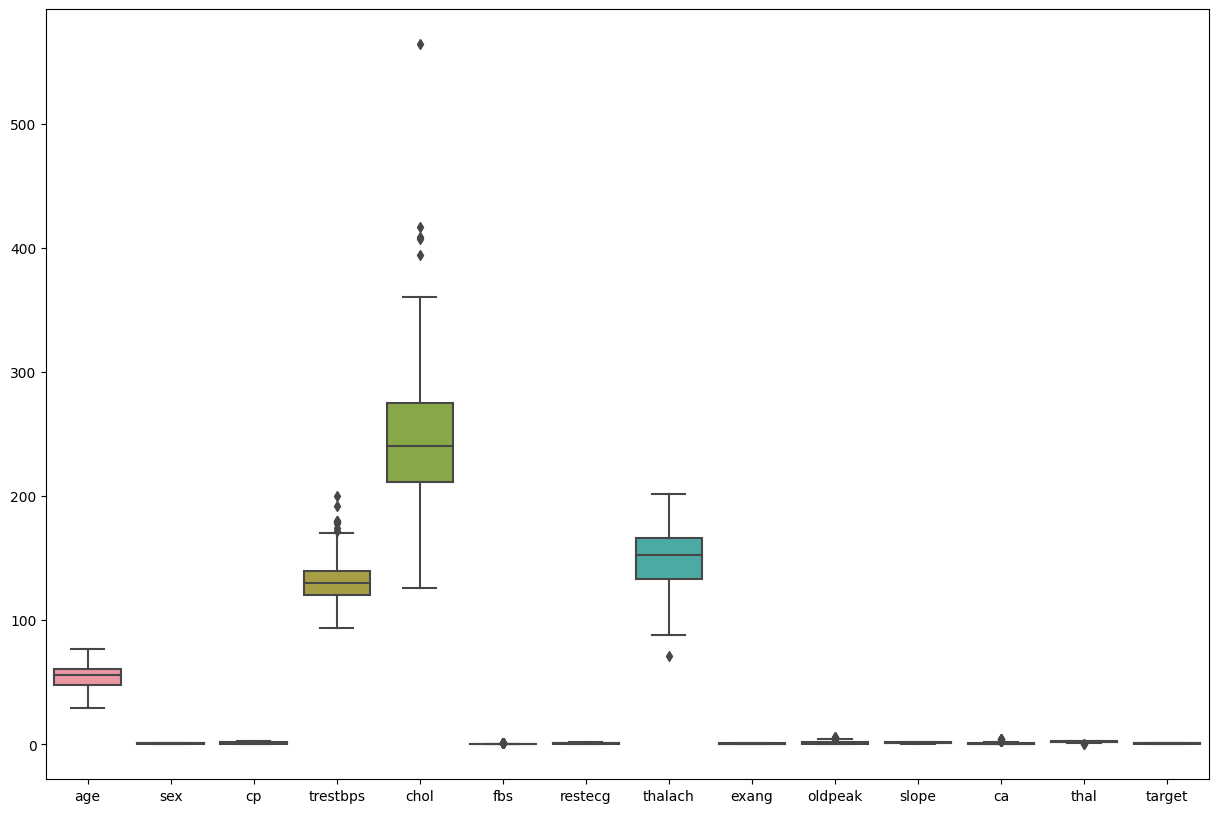

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=df)

Selanjutnya disini adalah mengecek outliers atau data yang selisihnya terlalu jauh , dimana disini saya menggunakan bantuan sns atau seaborns untuk memvisualisasikannya

In [ ]:
# Z-Score
columns = ['trestbps', 'chol', 'fbs', 'thalach', 'oldpeak', 'ca', 'thal']

for i in columns:
    upper_limit = df[i].mean() + 3*df[i].std()
    lower_limit = df[i].mean() - 3*df[i].std()

    df[i] = np.where(
       df[i]>upper_limit,
        upper_limit,
        np.where(
            df[i]<lower_limit,
            lower_limit,
            df[i]
        )
   )

karena terlihat dengan jelas adanya titikdiatas atau dibawah kotak maka data ini terindikasi memiliki outlier dan harus dihandling. disini saya menggunakn Z-score sebagai metode handling outliersnya dimana yang sya handling adalah kolom 'trestbps', 'chol', 'fbs', 'thalach', 'oldpeak', 'ca', 'thal'

<Axes: >

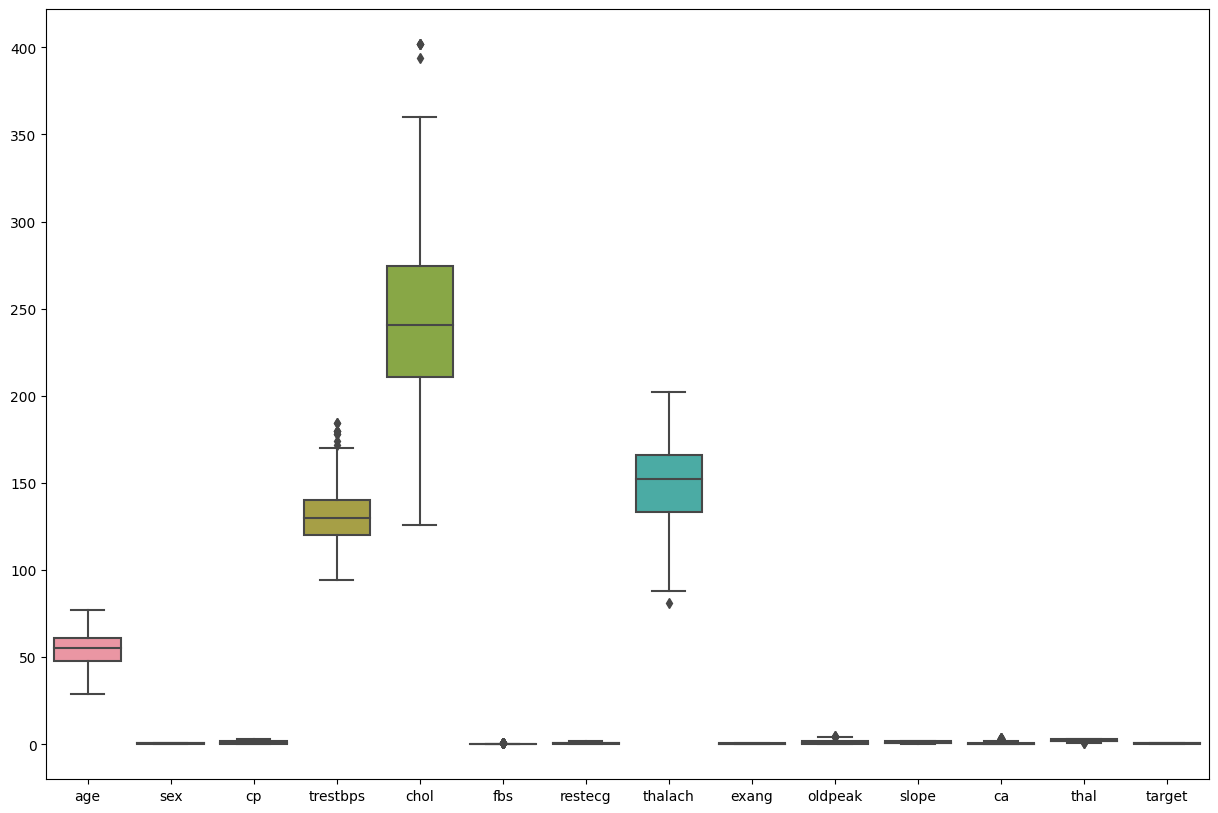

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=df)

lalu disini saya menampilkannya lagi menggunakn kode yang sama , karena menggunakan Z-score jadi masih ada outliers, namun todak separah sebelumnya

In [ ]:
total_samples = len(df)
class_counts = df['target'].value_counts()
minority_class = class_counts.min()
majority_class = class_counts.max()

imbalance_ratio = minority_class / majority_class
percentage_minority = (minority_class / total_samples) * 100
percentage_majority = (majority_class / total_samples) * 100

print(f"Total Sampel: {total_samples}")
print(f"Jumlah Kelas Minoritas: {minority_class}")
print(f"Jumlah Kelas Mayoritas: {majority_class}")
print(f"Rasio Ketidakseimbangan: {imbalance_ratio:.2f}")
print(f"Persentase Kelas Minoritas: {percentage_minority:.2f}%")
print(f"Persentase Kelas Mayoritas: {percentage_majority:.2f}%")

Total Sampel: 302
Jumlah Kelas Minoritas: 138
Jumlah Kelas Mayoritas: 164
Rasio Ketidakseimbangan: 0.84
Persentase Kelas Minoritas: 45.70%
Persentase Kelas Mayoritas: 54.30%


Terakhir disini adalah imbalance data

##Modelling

In [ ]:
# Memisahkan mana X dan mana y
y= df['target']
X= df.drop(['target'],axis=1)
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125.0,212.0,0.0,1,168.0,0,1.0,2,2.0,3.0
1,53,1,0,140.0,203.0,1.0,0,155.0,1,3.1,0,0.0,3.0
2,70,1,0,145.0,174.0,0.0,1,125.0,1,2.6,0,0.0,3.0
3,61,1,0,148.0,203.0,0.0,1,161.0,0,0.0,2,1.0,3.0
4,62,0,0,138.0,294.0,1.0,1,106.0,0,1.9,1,3.0,2.0


Disini saya memisahkan taegetnya dan memasukkannya ke variable y, dan yang bukan target ke variabel x

In [ ]:
#Train-Test Split
from sklearn.model_selection import train_test_split

dengan bantuan library saya mengimpot train_test_split untuk memisahkan data train an data test

In [ ]:
#Pisahin X, y jadi X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train dataset shape: ", X_train.shape)
print("y_train dataset shape: ", y_train.shape)
print("X_test dataset shape: ", X_test.shape)
print("y_test dataset shape: ", y_test.shape)

X_train dataset shape:  (241, 13)
y_train dataset shape:  (241,)
X_test dataset shape:  (61, 13)
y_test dataset shape:  (61,)


Disini saya memisahkannya dengan perbandingan 8:2 dengan random state 42

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier , ExtraTreesClassifier, AdaBoostClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier

disini saya mengimport model yang ingin saya uji

In [ ]:
all_model = [DecisionTreeClassifier,
            LogisticRegression,
             KNeighborsClassifier,
            SVC,
            LinearSVC,
            RandomForestClassifier,
            GradientBoostingClassifier,
            ExtraTreesClassifier,
             AdaBoostClassifier,
             LinearDiscriminantAnalysis,
             QuadraticDiscriminantAnalysis,
             LGBMClassifier,
             XGBClassifier,
             MLPClassifier]

model_name = ['DecisionTreeClassifier',
            'LogisticRegression',
             'KNeighborsClassifier',
            'SVC',
            'LinearSVC',
            'RandomForestClassifier',
            'GradientBoostingClassifier',
            'ExtraTreesClassifier',
              'AdaBoostClassifier',
             'LinearDiscriminantAnalysis',
             'QuadraticDiscriminantAnalysis',
             'LGBMClassifier',
             'XGBClassifier',
             'MLPClassifier']

hasil_train = []
hasil_test = []

for model_type in all_model:
    model = model_type()
    model.fit(X_train,y_train)
    hasil_train.append(model.score(X_train , y_train))
    hasil_test.append(model.score(X_test , y_test))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[LightGBM] [Info] Number of positive: 135, number of negative: 106
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000080 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 241
[LightGBM] [Info] Number of data points in the train set: 241, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.560166 -> initscore=0.241836
[LightGBM] [Info] Start training from score 0.241836
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Lalu disini saya melakukan uji ke semua model

##Model Evaluation

In [ ]:
data_hasil = pd.DataFrame()
data_hasil['model'] = model_name
data_hasil['Accuracy training'] = hasil_train
data_hasil['Accuracy test'] = hasil_test
data_hasil['gap'] = abs(data_hasil['Accuracy training'] - data_hasil['Accuracy test'])
data_hasil.sort_values(by='Accuracy test',ascending=False)

,model,Accuracy training,Accuracy test,gap
5,RandomForestClassifier,1.000000,0.836066,0.163934
6,GradientBoostingClassifier,1.000000,0.803279,0.196721
7,ExtraTreesClassifier,1.000000,0.803279,0.196721
9,LinearDiscriminantAnalysis,0.854772,0.803279,0.051493
12,XGBClassifier,1.000000,0.803279,0.196721
13,MLPClassifier,0.834025,0.803279,0.030746
8,AdaBoostClassifier,0.950207,0.786885,0.163322
11,LGBMClassifier,1.000000,0.786885,0.213115
0,DecisionTreeClassifier,1.000000,0.770492,0.229508
1,LogisticRegression,0.867220,0.770492,0.096728


disini saya menampilkan hasil ujinya

##Feature Importance

Feature: 0, Score: 0.08101
Feature: 1, Score: 0.03603
Feature: 2, Score: 0.13981
Feature: 3, Score: 0.07730
Feature: 4, Score: 0.07620
Feature: 5, Score: 0.01006
Feature: 6, Score: 0.01891
Feature: 7, Score: 0.11462
Feature: 8, Score: 0.04552
Feature: 9, Score: 0.11218
Feature: 10, Score: 0.05391
Feature: 11, Score: 0.11979
Feature: 12, Score: 0.11466


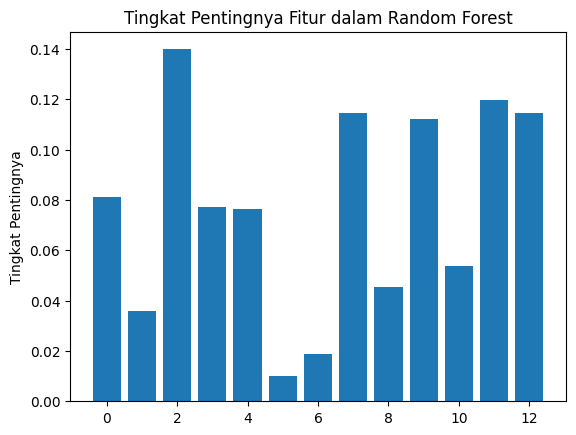

In [ ]:
model = RandomForestClassifier()
model.fit(X,y)
importance = model.feature_importances_

# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.ylabel('Tingkat Pentingnya')
plt.title('Tingkat Pentingnya Fitur dalam Random Forest')
plt.show()

Disini saya mencari feature importance dari model terbagus dari hasil uji tadi